# Applying Classification Modeling
The goal of this week's assessment is to find the model which best predicts whether a person will default on their loan. In doing so, we want to utilize all of the different tools we have learned over the course: data cleaning, EDA, feature engineering/transformation, feature selection, hyperparameter tuning, and model evaluation. 

Dataset: The dataset comes customers default payments in Taiwan. More information about the dataset and columns are found in the link below.

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#


You will fit three different models (KNN, Logistic Regression, and Decision Tree Classifier) and use gridsearch to find the best hyperparameters for those models. Then you will compare the performance of those three models on a test set to find the best one.  


## Process/Expectations

#### You will be working in pairs for this assessment; please have ONE notebook and be prepared to explain how you worked in your pair.
1. Clean up your data set so that you can do EDA. This includes handling null values, categorical variables, removing unimportant columns, and removing outliers.
2. Perform EDA to identify opportunities to create new features.
    - [Great Example of EDA for classification](https://www.kaggle.com/stephaniestallworth/titanic-eda-classification-end-to-end) 
    - [Using Pairplots with Classification](https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166)
3. Create polynomial and/or interaction features. You must also create at least 2 new features that are not interactions or polynomial transformations. For example, you can create a new dummy variable that based on the value of a continuous variable (billamount6 >2000) or take the average of some past amounts.
4. Perform some feature selction. This can happen beforehand using F-scores, or you can do it as part of your model building process by looking at the weights of your regularized logistic regression or feature importance of your decision tree.  
5. You must fit each of the three models to your data and tune at least 1 hyperparameter per model. 
6. After identifying the best hyperparameters for each model, fit those models to the test set and identify the best model overall using the evaluation metric of your choice.
7. Present your best model.

Loan default occurs when a borrower fails to pay back a debt according to the initial arrangement.


This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable.

This study reviewed the literature and used the following 23 variables as explanatory variables:

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

X2: Gender (1 = male; 2 = female).

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

X4: Marital status (1 = married; 2 = single; 3 = others).

X5: Age (year).

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.

X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

## Dataset

There are 25 initial variables:

- ID: ID of each client
- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE: Marital status (1=married, 2=single, 3=others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
- default.payment.next.month: Default payment (1=yes, 0=no)

In [59]:
### Needed libraries for Classification Modeling ###

import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

### Suppress notebook warnings ###
import warnings
warnings.filterwarnings('ignore')

### Pandas settings to avoid exponential form and display all columns ###
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', None)

## 1. Data Cleaning

### Initial data investigation 

In [41]:
### Load data ###
df = pd.read_csv('student_data.csv')

In [42]:
### Check distribution of dependent variable ###
df['default payment next month'].value_counts()

0    18691
1     5308
Name: default payment next month, dtype: int64

Based on initial investigation, there are more clients that will not default payment next month. Approximately **22%** of **23,999** clients will not default.

In [43]:
(18691 + 5308)

23999

In [44]:
### Check all columns ###
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [45]:
### Check data shape ###
df.shape

(23999, 25)

In [46]:
### Check columns with null values for potential cleaning ###
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

There are no null values in the dataset.

In [47]:
### Check column data types ###
df.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [48]:
### Drop ID column because it is only a unique identified and not a predictor ###
df.drop(['ID'], inplace=True, axis =1)

### Education

This section checks if all corresponding values in Education column satisfy the criteria mentioned in the dataset variable description.

In [49]:
### Check unique Education column values ###
df['EDUCATION'].unique()

array([1, 2, 3, 5, 6, 4, 0])

In [50]:
### Check count per unique value ###
df['EDUCATION'].value_counts()

2    11188
1     8442
3     3994
5      223
4      100
6       41
0       11
Name: EDUCATION, dtype: int64

Given that value 4 is Others while 5 and 6 are Unknown, we changed all 5 and 6 into Others.

In [51]:
### Replace all Unknown to Others ###
df['EDUCATION'].replace(5, 4, inplace=True)
df['EDUCATION'].replace(6, 4, inplace=True)
df['EDUCATION'].replace(0, 4, inplace=True)

df['EDUCATION'].value_counts()

2    11188
1     8442
3     3994
4      375
Name: EDUCATION, dtype: int64

### Marriage

This section checks if all corresponding values in Marriage column satisfy the criteria mentioned in the dataset variable description.

In [52]:
### Check unique Marriage column values ###
df['MARRIAGE'].unique()

array([2, 1, 3, 0])

In [53]:
### Check count per unique value ###
df['MARRIAGE'].value_counts()

2    12735
1    10958
3      263
0       43
Name: MARRIAGE, dtype: int64

Based on the guidelines, there should only be three (3) variables for Marriage - 1, 2 and 3. Those with 0 as values can be safely bucketed into Others (3).

In [54]:
### Replace all Unknown to Others ###
df['MARRIAGE'].replace(0, 3, inplace=True)

df['MARRIAGE'].value_counts()

2    12735
1    10958
3      306
Name: MARRIAGE, dtype: int64

### Sex

In [55]:
df['SEX'].unique()

array([1, 2])

No cleaning required for this column as the values are either 1 or 2 satisfying the criteria.

### Pay_N

This section checks if all corresponding values in the multiple Pay_N columns satisfy the dataset variable descriptions.

In [56]:
### Check unique Pay_N column values ###
p0 = df['PAY_0'].unique()
p2 = df['PAY_2'].unique()
p3 = df['PAY_3'].unique()
p4 = df['PAY_4'].unique()
p5 = df['PAY_5'].unique()
p6 = df['PAY_6'].unique()

print (p0, p2, p3, p4, p5, p6)

[-2  2 -1  0  1  3  8  5  4  6  7] [-2  2 -1  0  3  1  4  7  8  6  5] [-2  2 -1  0  3  6  5  4  7  1  8] [-2  0 -1  2  3  5  4  7  6  1  8] [-2  0 -1  2  3  4  7  5  6  8] [-2  0 -1  2  3  4  7  6  5  8]


Based on the result above, the following values are not in the variable guidelines: -2 and 0. -1 means the the bill is duly paid so -2 and 0 do not make sense. -2 and 0 likely mean that the corresponding bills are also paid thus, they can be replaced with -1 value defined as "pay duly".

In [57]:
### Replace all -2 and 0 into -1 ###
df['PAY_0'].replace(-2, -1, inplace=True)
df['PAY_0'].replace(0, -1, inplace=True)
df['PAY_2'].replace(-2, -1, inplace=True)
df['PAY_2'].replace(0, -1, inplace=True)
df['PAY_3'].replace(-2, -1, inplace=True)
df['PAY_3'].replace(0, -1, inplace=True)
df['PAY_4'].replace(-2, -1, inplace=True)
df['PAY_4'].replace(0, -1, inplace=True)
df['PAY_5'].replace(-2, -1, inplace=True)
df['PAY_5'].replace(0, -1, inplace=True)
df['PAY_6'].replace(-2, -1, inplace=True)
df['PAY_6'].replace(0, -1, inplace=True)

p0 = df['PAY_0'].unique()
p2 = df['PAY_2'].unique()
p3 = df['PAY_3'].unique()
p4 = df['PAY_4'].unique()
p5 = df['PAY_5'].unique()
p6 = df['PAY_6'].unique()

print (p0, p2, p3, p4, p5, p6)

[-1  2  1  3  8  5  4  6  7] [-1  2  3  1  4  7  8  6  5] [-1  2  3  6  5  4  7  1  8] [-1  2  3  5  4  7  6  1  8] [-1  2  3  4  7  5  6  8] [-1  2  3  4  7  6  5  8]


## 2. EDA

### Correlation

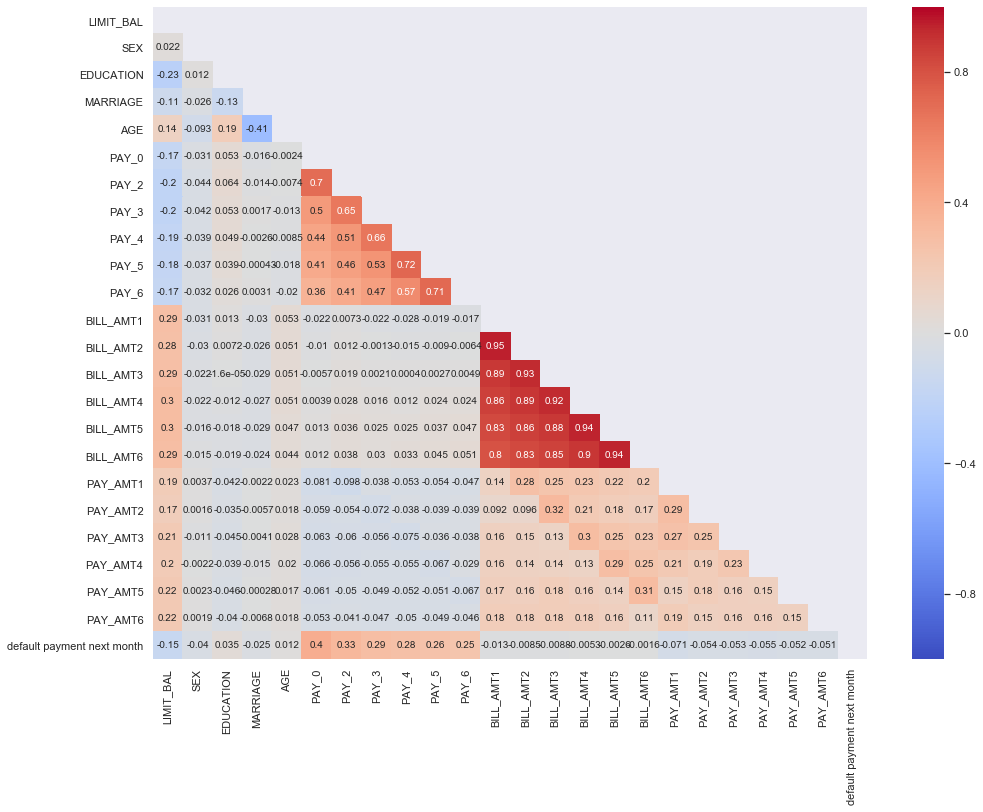

In [58]:
f, ax = plt.subplots(figsize=(16, 12))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', mask = matrix)

### Dependent Variable - Will default next month or not?

In [64]:
default_df = pd.DataFrame(df['default payment next month'].value_counts())
default_df.reset_index(inplace = True)
default_df.columns = ['Status', 'Count']
default_df

,Status,Count
0,0,18691
1,1,5308


In [69]:
default_df['Status'].replace(0, "Will not default", inplace=True)
default_df['Status'].replace(1, "Will default", inplace=True)

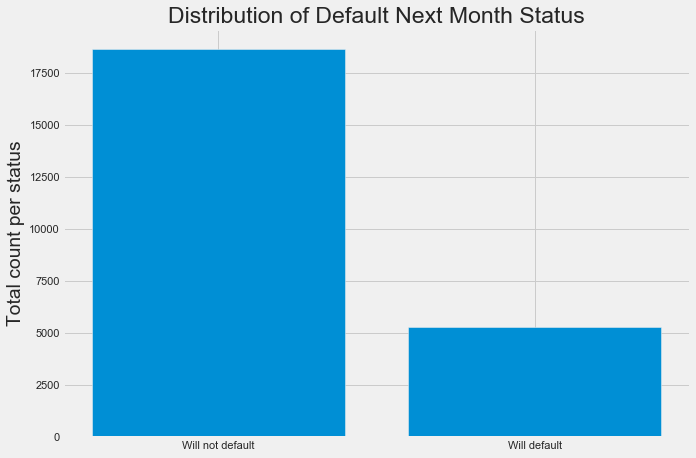

In [77]:
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(figsize=(10,7))

ax.bar(default_df["Status"],default_df["Count"])

ax.set_ylabel("Total count per status")
ax.set_title('Distribution of Default Next Month Status')

plt.show()

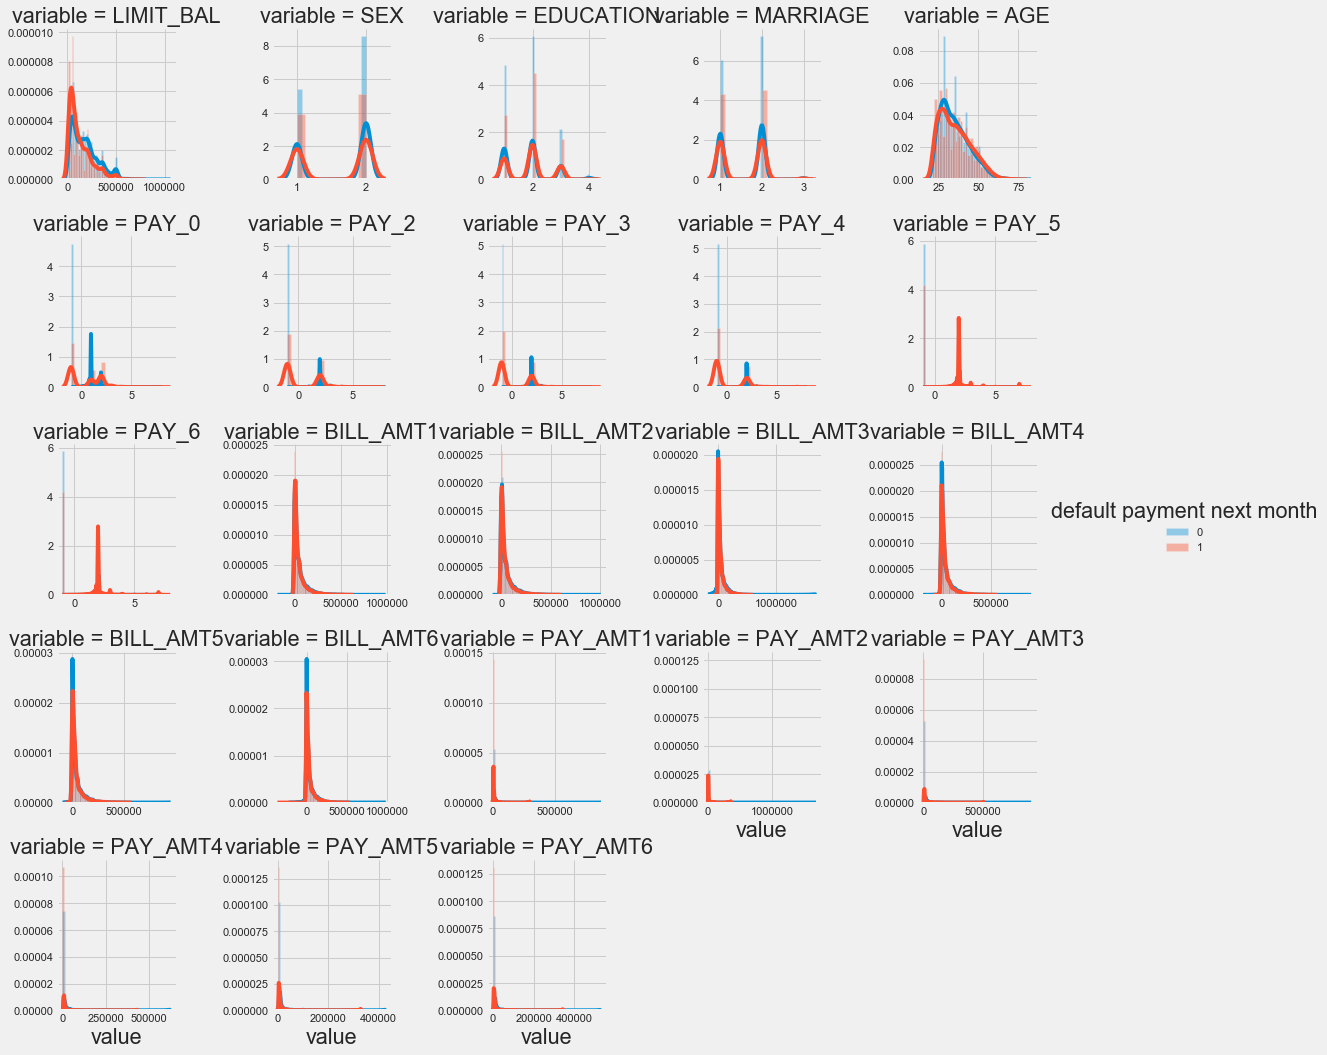

In [76]:
output = 'default payment next month'

cols = [ f for f in df.columns if df.dtypes[ f ] != "object"]
cols.remove( output )

f = pd.melt( df, id_vars=output, value_vars=cols)
g = sns.FacetGrid( f, hue=output, col="variable", col_wrap=5, sharex=False, sharey=False )
g = g.map( sns.distplot, "value", kde=True).add_legend()

## Features versus Target

### Limit Balance

In [79]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,23999.000,23999.000,23999.000,23999.000,23999.000,23999.000,23999.000,23999.000,23999.000,23999.000,23999.000,23999.000,23999.000,23999.000,23999.000,23999.000,23999.000,23999.000,23999.000,23999.000,23999.000,23999.000,23999.000,23999.000
mean,167825.729,1.604,1.846,1.556,35.523,-0.417,-0.535,-0.555,-0.624,-0.678,-0.670,51589.035,49521.698,47474.826,43796.590,40748.049,39226.852,5687.720,6019.571,5253.323,4824.491,4825.034,5245.643,0.221
std,129915.116,0.489,0.746,0.522,9.254,1.142,1.142,1.124,1.069,1.004,1.009,74104.133,71551.215,70010.815,64927.450,61257.538,60075.537,16698.507,24541.363,17967.029,15730.754,15596.580,17795.775,0.415
min,10000.000,1.000,1.000,1.000,21.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-165580.000,-67526.000,-157264.000,-170000.000,-81334.000,-339603.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,50000.000,1.000,1.000,1.000,28.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,3577.500,2958.000,2718.000,2392.500,1801.000,1280.000,1000.000,858.500,395.000,300.000,269.500,125.000,0.000
50%,140000.000,2.000,2.000,2.000,34.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,22472.000,21290.000,20223.000,19145.000,18227.000,17175.000,2110.000,2012.000,1809.000,1500.000,1500.000,1500.000,0.000
75%,240000.000,2.000,2.000,2.000,42.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,67767.000,64635.500,60962.000,55418.000,50581.000,49434.500,5020.000,5000.000,4561.000,4089.000,4029.500,4008.000,0.000
max,1000000.000,2.000,4.000,3.000,79.000,8.000,8.000,8.000,8.000,8.000,8.000,964511.000,983931.000,1664089.000,891586.000,927171.000,961664.000,873552.000,1684259.000,896040.000,621000.000,426529.000,528666.000,1.000


In [102]:
bins = [0, 200000, 400000, 600000, 800000, 1000000]
labels = [200000, 400000, 600000, 800000, 1000000]
df['binned'] = pd.cut(df['LIMIT_BAL'], bins=bins, labels=labels)

In [103]:
limit_df = df.groupby(['binned', 'default payment next month']).size().unstack(1)
limit_df.reset_index(inplace = True)
limit_df.columns = ['Limit Balance', 'Will not default', 'Will default']
limit_df

,Limit Balance,Will not default,Will default
0,200000,12117.000,4165.000
1,400000,5299.000,968.000
2,600000,1213.000,170.000
3,800000,61.000,5.000
4,1000000,1.000,nan


In [107]:
limit_df["percent"] = limit_df["Will default"] / (limit_df["Will not default"] + limit_df["Will default"])
limit_df

,Limit Balance,Will not default,Will default,percent
0,200000,12117.000,4165.000,0.256
1,400000,5299.000,968.000,0.154
2,600000,1213.000,170.000,0.123
3,800000,61.000,5.000,0.076
4,1000000,1.000,nan,nan


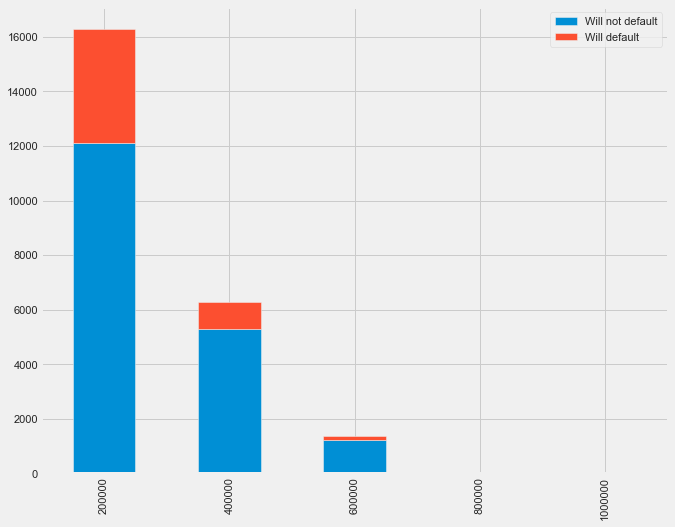

In [124]:
limit_df.index = [200000, 400000, 600000, 800000, 1000000]
limit_df.plot(kind='bar',stacked=True, figsize=(10,8))

### Sex

In [123]:
sex_df = df.groupby(['SEX', 'default payment next month']).size().unstack(1)
sex_df.reset_index(inplace = True)
sex_df.columns = ['Gender', 'Will not default', 'Will default']
sex_df

,Gender,Will not default,Will default
0,1,7215,2298
1,2,11476,3010


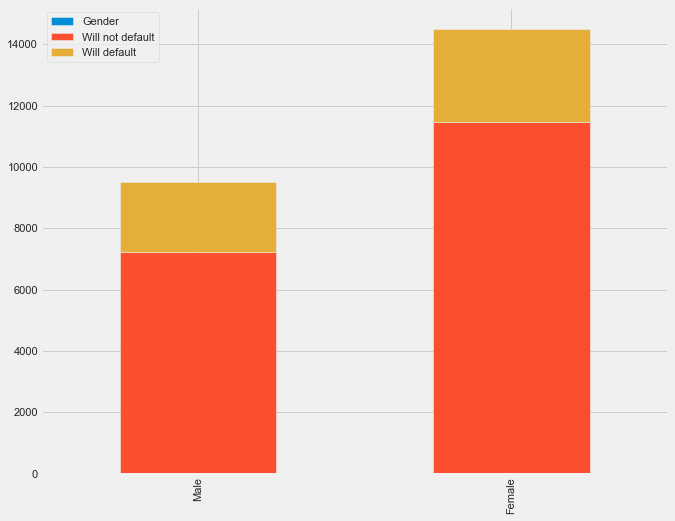

In [127]:
sex_df.index = ['Male', 'Female']
sex_df.plot(kind='bar',stacked=True, figsize=(10,8))

### Summary of Observations

- Those with lower LIMIT_BAL values are more likely to default
- Males (sex = 1) are more likely to default versus females (sex = 2)
- Those with lower education (not University or Graduate)are more likely to default versus those with higher education
- Non-singles (Married) are more likely to default versus singles
- 30 to 40 year old clients are more likely to not default versus other age groups
- Those who pay duly are much more likely to not default versus those who have balances left

## 3. Feature Engineering

## 4. Feature Selection

## 5. Model Fitting and Hyperparameter Tuning
KNN, Logistic Regression, Decision Tree

## 6. Model Evaluation

## 7. Final Model